In [1]:
import numpy as np
import sys
sys.path.append('../../')
sys.path.append('../../pyfos/')
from pyfos.models.feedforward import build_feedforward
from pyfos.models.var_feedforward import build_var_feedforward
from pyfos.generic.optimizer import gd_optimizer
from pyfos.generic.regularizers import gaus_prior
from functools import partial 
from pyfos.tc.simple import  simple_tc
from pyfos.tc.cv import  cv_tc
from pyfos.hyperoptimizers.random_search import random_optimize
from pyfos.hyperoptimizers.no_optimize import no_optimize
import theano
%matplotlib inline
import matplotlib.pylab as plt
import random

In [3]:
matrix = np.load('../../../data/matrix.npy')
X, Y = np.load('../../../data/linearx.npy'), np.load('../../../data/lineary.npy')
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
lr = theano.shared(10**(-2))
alphas = theano.shared(np.array([1.0, 1.0]))
optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_var_feedforward, structure = [2,1], nonlinearity=lambda x:x, log_alphas=alphas, bias=False, param_pool_size=100)



In [4]:
def choicer():
    a1 = np.random.uniform(low=0.0, high=10.0)
    a2 = np.random.uniform(low=0.0, high=10.0)
    a1 = np.sqrt(10**(a1))
    a2 = np.sqrt(10**(a2))
    return np.log([a1,a2])
print choicer()    

[ 2.56471449  2.67586259]


In [6]:
bests = []

lr_ranges =   [0]
#lr_ranges = [2*10**(-2)]
#alpha_ranges = [np.array([4.60517019,4.60517019])]
for trial in range(50):
    print 'attemp'
    
    bests.append( random_optimize(partial(simple_tc,   batch_size=100), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas] ,
     [choicer], verbose=-1))
    


attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp


INFO (theano.gof.compilelock): Refreshing lock /home/legin/.theano/compiledir_Linux-3.19--generic-x86_64-with-Ubuntu-14.04-trusty-x86_64-2.7.6-64/lock_dir/lock


attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp
attemp


INFO (theano.gof.compilelock): Refreshing lock /home/legin/.theano/compiledir_Linux-3.19--generic-x86_64-with-Ubuntu-14.04-trusty-x86_64-2.7.6-64/lock_dir/lock


attemp
attemp


In [9]:
h

NameError: name 'h' is not defined

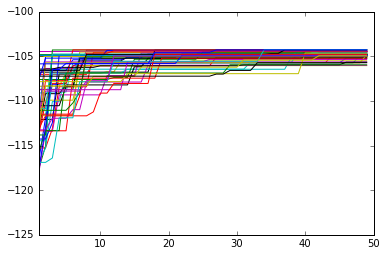

In [7]:
for b in bests:
    
    history = []
    for i in xrange(0, len(b.history)):
        
        best_value = max([h[1] for h in b.history[:i+1]])
        
        history.append(best_value)
    plt.plot(history)
#plt.ylim((-10000, -80))
plt.xlim((1,50))
import cPickle
with open('results_var_rand.pckl','wb') as out:
    cPickle.dump(bests, out)


In [36]:
import theano.tensor as T
X = T.matrix()
result = []
models = []
predicts = []

for m in xrange(1):
    models.append(model_build(dataset_size=100))
    predict = models[m].predict_var(X)
    predicts.append(theano.function([X], predict))
    
for b in bests[1:]:
    scores = [b.history[i][1] for i in xrange(len(b.history))]
    best = np.argmax(scores)
    print b.history[best]
    
    for m in xrange(1):
        print b.history[best][2][m]
        models[m].params.set_value(b.history[best][2][m])
        result.append(np.mean((predicts[m](X_test)[:,0]-Y_test)**2))
        print result[-1]
    """
    bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
     [alpha_ranges, lr_ranges], verbose=100))
    X = T.matrix()    
    model = model_build(dataset_size=100)
    
    
    """

#print np.mean(result)
#print np.std(result)

([array([ 5.75646273,  5.75646273]), 0.005], array(-119.73649388915732), [array([ 20.06844057,  99.33847011,  -8.60154903, -89.81348147])])
[ 20.06844057  99.33847011  -8.60154903 -89.81348147]
0.369746784637
([array([ 6.90775528,  5.75646273]), 0.005], array(nan), [array([ nan,  nan,  nan,  nan])])
[ nan  nan  nan  nan]
nan
([array([ 3.45387764,  4.60517019]), 0.005], array(-116.1346761609951), [array([  20.05461046,   99.35705343, -279.45847357,   -3.24760938])])
[  20.05461046   99.35705343 -279.45847357   -3.24760938]
0.347622179067
([array([ 3.45387764,  2.30258509]), 0.005], array(nan), [array([ nan,  nan,  nan,  nan])])
[ nan  nan  nan  nan]
nan
([array([ 4.60517019,  5.75646273]), 0.005], array(-120.09841534010225), [array([ 20.06961494,  99.31100784, -11.61600205,  -3.82585916])])
[ 20.06961494  99.31100784 -11.61600205  -3.82585916]
0.400808769845
([array([ 4.60517019,  3.45387764]), 0.005], array(nan), [array([ nan,  nan,  nan,  nan])])
[ nan  nan  nan  nan]
nan
([array([ 0.

In [45]:
best_values = []
for b in bests:
    history = []
    for i in xrange(0, len(b.history)):
        
        best_value = max([h[1] for h in b.history[:i+1]])
        
        history.append(best_value)
        best_values.append(history[-1])
print np.mean(best_values)

-156.587617036


[([array([  31.6227766 ,  316.22776602]), 0.001], array(-127.64285224474986)),
 ([array([ 10.        ,   3.16227766]), 0.01], array(-162.5087255392545)),
 ([array([ 31.6227766 ,   3.16227766]), 0.01], array(-2.7627426873481633e+42)),
 ([array([  10.,  100.]), 0.005], array(-124.3719052719263)),
 ([array([  3.16227766,  31.6227766 ]), 0.01], array(-1.2198974168241432e+41)),
 ([array([ 316.22776602,    1.        ]), 0.001], array(-122.78697142872564)),
 ([array([ 1.,  1.]), 0.01], array(-2.048288202990528e+45)),
 ([array([ 316.22776602,   10.        ]), 0.02], array(nan)),
 ([array([   1.,  100.]), 0.005], array(-127.03124347465777)),
 ([array([  3.16227766,  31.6227766 ]), 0.01], array(-3.879875247817619e+79))]

In [33]:
for i in bests:
    print np.array(i.best_values[0])**2

[ 1.  1.]
[ 1.  1.]
[ 10.   1.]
[ 1.  1.]
[ 1.  1.]


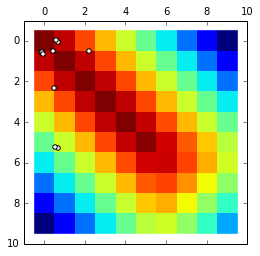

In [7]:
plt.matshow(matrix)
for i in bests:
    i = i.best_values[0]**2
    i = np.log10(np.exp(i))
    
    plt.scatter(i[0]+np.random.randn(1)*0.1,i[1]+np.random.randn(1)*0.1, c='w')

In [7]:
model = model_build(dataset_size=100)

In [9]:
import theano.tensor as T

In [28]:
X,Y = T.matrix(), T.vector()

In [29]:
cost = model.cost(X,Y)

In [35]:
f = theano.function([X,Y], cost)
print cost
f2 = theano.function([X,Y], T.grad(cost, model.params))
model.params.set_value([ 102.5926679 ,    0.23016751])

Elemwise{add,no_inplace}.0


In [36]:
#f(np.random.randn(100,2), np.random.randn(100))

f2(np.random.randn(100,2), np.random.randn(100))

array([ -1.02592668e+08,  -2.30167510e+05])